## ICM2813 2020-2
# Proyecto Practico \#1

El siguiente proyecto busca que usted pueda implementar un control PID de modo de poder controlar la posición de un motor con una barra y analizar los resultados.

# Diseño del controlador

Diseñar un controlador que permita mover la barra desde 0 grados (vertical) a 90 grados. Se le solicita que diseñe un controlador que permita hacer esto siguiendo las restricciones definidas en el enunciado del PP1.

In [ ]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = 100
        
        # Almacenar variables que desee aquí
        print("{:.3f},\t{:.2f}".format(t,np.rad2deg(theta)))
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))

        #Detender simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	-151.13
0.050,	-148.48


### Análisis de Resultados
Al terminar la simualción puede graficar y analizar resultados aquí. A continuación un ejemplo que puede modificar libremente. Recuerde entregar gráficos con título, nombre de ejes, unidades, etc.

In [ ]:
%pylab inline
plot(m.t,m.theta)

# Diseño Lazo Abierto

In [1]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        self.velocidad = []
        self.PWM = []
        
        # Se generan las variables necesarias para generar la velocidad del brazo
        self.theta_ant = 0
        self.t_ant = 0
        self.v = 0

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = 100
        
        # Almacenar variables que desee aquí
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))
        self.PWM.append(pwm_motor)
        
    
        if t >0:
            self.v = np.rad2deg((np.abs(theta)-np.abs(self.theta_ant))/(t-self.t_ant))
            self.velocidad.append(self.v)
        else:
            self.velocidad.append(self.v)
        self.t_ant = t
        self.theta_ant = theta
        
        print("{:.3f},\t{:.2f},\t{:1f}".format(t,np.rad2deg(theta),self.v))
        
        #Detender simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	0.39,	0.000000
0.050,	-10.78,	207.695271
0.100,	-18.67,	157.788592
0.150,	-16.98,	-33.821254
0.200,	-15.07,	-38.106112
0.250,	-11.98,	-61.921440
0.300,	-7.99,	-79.631439
0.350,	-6.91,	-21.609767
0.400,	-2.13,	-95.697075
0.450,	0.33,	-36.049494
0.500,	4.83,	90.072542
0.550,	6.06,	24.567960
0.600,	9.81,	75.119415
0.650,	13.61,	75.844731
0.700,	17.24,	72.756515
0.750,	20.24,	59.968503
0.800,	23.29,	60.898626
0.850,	26.65,	67.212559
0.900,	30.65,	79.941411
0.950,	33.42,	55.475547
1.000,	37.48,	81.186114
1.050,	41.68,	84.082268
1.100,	44.71,	60.557545
1.150,	49.03,	86.346542
1.200,	52.80,	75.356281
1.250,	56.53,	74.583736
1.300,	60.64,	82.306066
1.350,	64.81,	83.448890
1.400,	68.50,	73.707420
1.450,	72.84,	86.775139
1.500,	7

### Análisis de Resultados

Populating the interactive namespace from numpy and matplotlib


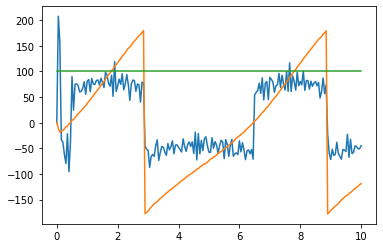

In [2]:
%pylab inline
plot(m.t,m.velocidad)
plot(m.t,m.theta)
plot(m.t,m.PWM)

# Diseño Sistema Realimientado

## Proporcional

In [1]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        self.velocidad = []
        self.PWM = []
        
        # Se generan las variables necesarias para calcular velocidad
        self.theta_ant = 0
        self.t_ant = 0
        self.v = 0
        
        # Se generan las variables para el control proporcional
        self.Kp = 15
        self.referencia = 90 # grados, va a ser el valor inicial, que luego cambiará a 0°
        self.error = 0
        self.intervalo = 5 # segundos

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = -int(self.Kp*self.error) # Se define PWM a partir de Kp y el error
        
        
        if t>5.000:
            self.referencia = 0
            
        # Error
        self.error = np.rad2deg(theta) - self.referencia
            
        
        
        # Almacenar variables que desee aquí
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))
        self.PWM.append(pwm_motor)
        
        if t >0:
            self.v = np.rad2deg((np.abs(theta)-np.abs(self.theta_ant))/(t-self.t_ant))
            self.velocidad.append(self.v)
        else:
            self.velocidad.append(self.v)
        self.t_ant = t
        self.theta_ant = theta
        
        print("{:.3f},\t{:.2f},\t{:.2f},\t{:.2f},\t{:.2f}".format(t,np.rad2deg(theta),self.v,self.error,pwm_motor))
        
        #Detener simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	-1.00,	0.00,	-91.00,	0.00
0.050,	-11.20,	203.89,	-101.20,	1365.00
0.100,	-18.68,	149.63,	-108.68,	1517.00
0.150,	-10.06,	-172.40,	-100.06,	1630.00
0.200,	16.80,	134.91,	-73.20,	1500.00
0.250,	62.87,	921.41,	-27.13,	1097.00
0.300,	110.77,	957.98,	20.77,	406.00
0.350,	151.20,	808.64,	61.20,	-311.00
0.400,	-179.70,	569.87,	-269.70,	-918.00
0.450,	-171.94,	-155.21,	-261.94,	4045.00
0.500,	174.14,	44.16,	84.14,	3929.00
0.550,	163.65,	-209.99,	73.65,	-1262.00
0.600,	177.23,	271.69,	87.23,	-1104.00
0.650,	-170.77,	-129.23,	-260.77,	-1308.00
0.700,	179.89,	182.48,	89.89,	3911.00
0.750,	149.50,	-607.89,	59.50,	-1348.00
0.800,	129.19,	-406.13,	39.19,	-892.00
0.850,	116.63,	-251.17,	26.63,	-587.00
0.900,	97.89,	-374.78,	7.89,	-399

Populating the interactive namespace from numpy and matplotlib


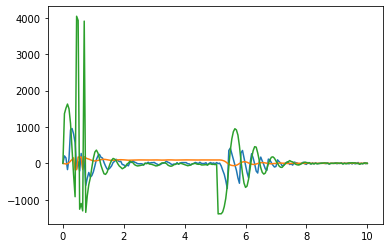

In [2]:
%pylab inline
plot(m.t,m.velocidad)
plot(m.t,m.theta)
plot(m.t,m.PWM)

## Proporcional Derivativo 

In [1]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        self.velocidad = []
        self.PWM = []
        
        
        self.theta_ant = 0
        self.t_ant = 0
        self.v = 0
        
        self.Kp = 5
        self.Kd = 0.1
        self.referencia = 90 # grados
        self.error = 0
        self.error_anterior = 0
        self.error_derivativo = 0
        self.intervalo = 5 # segundos
        self.dt = 0.05
        

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = -int(self.Kp*self.error + self.Kd*self.error_derivativo)
        
        
        if t>5.000:
            self.referencia = 0
            
        # Error
        self.error = np.rad2deg(theta) - self.referencia
        self.error_derivativo=(self.error-self.error_anterior)/self.dt    
        
        
        # Almacenar variables que desee aquí
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))
        self.PWM.append(pwm_motor)
        
        if t >0:
            self.v = np.rad2deg((np.abs(theta)-np.abs(self.theta_ant))/(t-self.t_ant))
            self.velocidad.append(self.v)
        else:
            self.velocidad.append(self.v)
        self.t_ant = t
        self.theta_ant = theta
        self.error_anterior=self.error

        print("{:.3f},\t{:.2f},\t{:.2f},\t{:.2f},\t{:.2f}".format(t,np.rad2deg(theta),self.v,self.error,pwm_motor))
        
        #Detener simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	0.18,	0.00,	-89.82,	0.00
0.050,	-10.82,	212.88,	-100.82,	628.00
0.100,	-18.16,	146.75,	-108.16,	526.00
0.150,	-10.78,	-147.56,	-100.78,	555.00
0.200,	4.18,	-132.03,	-85.82,	489.00
0.250,	21.20,	340.29,	-68.80,	399.00
0.300,	37.96,	335.30,	-52.04,	309.00
0.350,	51.15,	263.89,	-38.85,	226.00
0.400,	61.56,	208.04,	-28.44,	167.00
0.450,	68.63,	141.44,	-21.37,	121.00
0.500,	74.98,	126.96,	-15.02,	92.00
0.550,	80.71,	114.67,	-9.29,	62.00
0.600,	83.17,	49.21,	-6.83,	34.00
0.650,	86.40,	64.62,	-3.60,	29.00
0.700,	89.31,	58.23,	-0.69,	11.00
0.750,	90.26,	19.01,	0.26,	-2.00
0.800,	91.12,	17.18,	1.12,	-3.00
0.850,	92.75,	32.57,	2.75,	-7.00
0.900,	94.42,	33.40,	4.42,	-17.00
0.950,	95.18,	15.22,	5.18,	-25.00
1.000,	94.84,	-6.89,	4.8

Populating the interactive namespace from numpy and matplotlib


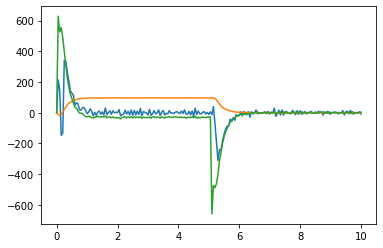

In [2]:
%pylab inline
plot(m.t,m.velocidad)
plot(m.t,m.theta)
plot(m.t,m.PWM)

## Proporcional Integral

In [1]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        self.velocidad = []
        self.PWM = []
        
        
        self.theta_ant = 0
        self.t_ant = 0
        self.v = 0
        
        self.Kp = 5
        self.Ki = 0.5
        self.referencia = 90 # grados
        self.error = 0
        self.error_anterior = 0
        self.error_acumulado = 0
        self.intervalo = 5 # segundos
        self.dt = 0.05
        

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = -int(self.Kp*self.error + self.Ki*self.error_acumulado*self.dt)
        
        
        if t>5.000:
            self.referencia = 0
            
        # Error
        self.error = np.rad2deg(theta) - self.referencia
        self.error_acumulado += self.error  
        
        
        # Almacenar variables que desee aquí
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))
        self.PWM.append(pwm_motor)
        
        
        if t >0:
            self.v = np.rad2deg((np.abs(theta)-np.abs(self.theta_ant))/(t-self.t_ant))
            self.velocidad.append(self.v)
        else:
            self.velocidad.append(self.v)
        self.t_ant = t
        self.theta_ant = theta
        self.error_anterior=self.error

        print("{:.3f},\t{:.2f},\t{:.2f},\t{:.2f},\t{:.2f}".format(t,np.rad2deg(theta),self.v,self.error,pwm_motor))
        
        #Detener simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()


  Running B0 Remote API client with channel name [icm2813_motor]
  make sure that: 1) the B0 resolver is running
                  2) CoppeliaSim is running the B0 Remote API server with the same channel name
  Initializing...


  Connected!

Inicializando Motor
0.000,	0.63,	0.00,	-89.37,	0.00
0.050,	-10.66,	200.62,	-100.66,	449.00
0.100,	-19.51,	177.01,	-109.51,	508.00
0.150,	-10.64,	-177.36,	-100.64,	555.00
0.200,	4.01,	-132.69,	-85.99,	513.00
0.250,	21.00,	339.89,	-69.00,	442.00
0.300,	36.68,	313.62,	-53.32,	358.00
0.350,	52.33,	313.00,	-37.67,	281.00
0.400,	64.38,	241.05,	-25.62,	204.00
0.450,	74.48,	201.92,	-15.52,	144.00
0.500,	81.80,	146.41,	-8.20,	94.00
0.550,	87.57,	115.32,	-2.43,	58.00
0.600,	91.43,	77.27,	1.43,	29.00
0.650,	93.83,	47.95,	3.83,	10.00
0.700,	95.37,	30.79,	5.37,	-1.00
0.750,	96.57,	23.97,	6.57,	-9.00
0.800,	98.10,	30.61,	8.10,	-15.00
0.850,	100.09,	39.94,	10.09,	-23.00
0.900,	100.13,	0.80,	10.13,	-33.00
0.950,	99.56,	-11.57,	9.56,	-34.00
1.000,	98.92,	-12.72,	

Populating the interactive namespace from numpy and matplotlib


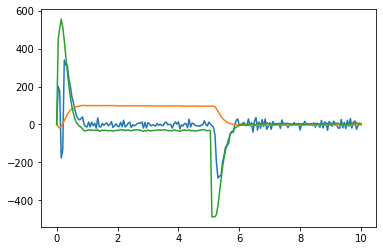

In [2]:
%pylab inline
plot(m.t,m.velocidad)
plot(m.t,m.theta)
plot(m.t,m.PWM)

## Control PID

In [2]:
from ICM2813.Server import Motor
import numpy as np

class MiControlador(Motor):
    def __init__(self):
        self.stop()        # detener simualción al principio
        super().__init__() # no modificar
        # Las siguientes variables son de ejemplo y puede agregar o eliminar según lo necesite.
        # Estas variables son útiles para almacenar valores entre cada iteración de su controlador
        self.t = []
        self.theta = []
        self.velocidad = []
        self.PWM = []
        
        
        self.theta_ant = 0
        self.t_ant = 0
        self.v = 0
        
        self.Kp = 5
        self.Kd = 0.9
        self.Ki = 0.1
        self.referencia = 90 # grados
        self.error = 0
        self.error_anterior = 0
        self.error_derivativo = 0
        self.error_acumulado = 0
        self.intervalo = 5 # segundos
        self.dt = 0.05
        

    def control(self, theta, t):
        '''
        Esta función es la única que se requiere para poder correr el programa. Si lo desea puede agregar más  
        funciones a la clase MiControlador. Esta función recibe como entrada (ya calculada) lo siguiente:
        * theta: Que corresponde al ángulo del motor en radianes (+/-pi)
        * t: tiempo entre cada vez que se le actualizan los comandos al robot (50 ms)
        A continuación se presenta un código para mover el motor en forma continua que debe modificar
        para implementar su controlador PID
        '''
        
        # Definir PWM a aplicar en el motor (voltaje)
        pwm_motor = -int(self.Kp*self.error + self.Kd*self.error_derivativo + self.Ki*self.error_acumulado*self.dt)
        
        
        if t>5.000:
            self.referencia = 0
            
        # Error
        self.error = np.rad2deg(theta) - self.referencia
        self.error_derivativo=(self.error-self.error_anterior)/self.dt
        self.error_acumulado += self.error  
        
        
        # Almacenar variables que desee aquí
        self.t.append(t)
        self.theta.append(np.rad2deg(theta))
        self.PWM.append(pwm_motor)
        
        if t >0:
            self.v = np.rad2deg((np.abs(theta)-np.abs(self.theta_ant))/(t-self.t_ant))
            self.velocidad.append(self.v)
        else:
            self.velocidad.append(self.v)
        self.t_ant = t
        self.theta_ant = theta
        self.error_anterior=self.error

        print("{:.3f},\t{:.2f},\t{:.2f},\t{:.2f},\t{:.2f}".format(t,np.rad2deg(theta),self.v,self.error,pwm_motor))
        
        #Detener simulación después de un tiempo
        if t >= 10:
            self.stop()

        return pwm_motor

m = MiControlador()
m.run()

ModuleNotFoundError: No module named 'ICM2813'

Populating the interactive namespace from numpy and matplotlib


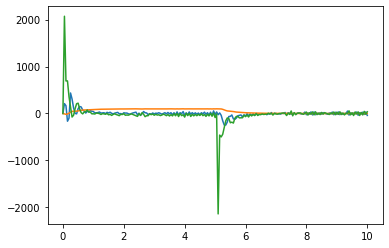

In [3]:
%pylab inline
plot(m.t,m.velocidad)
plot(m.t,m.theta)
plot(m.t,m.PWM)